# Függetlenségvizsgálat

In [42]:
import numpy as np
from scipy.stats import chi2, chi2_contingency
from IPython.display import display, Math

In [43]:
matrix = np.matrix('15 10 5; 10 10 20; 5 20 5')

n = matrix.sum()
n

100

In [44]:
i_sums = matrix.sum(axis=1)
i_sums

matrix([[30],
        [40],
        [30]])

In [45]:
j_sums = matrix.sum(axis=0) 
j_sums

matrix([[30, 40, 30]])

In [46]:
matrix.shape

(3, 3)

In [47]:
eq = rf''
eq2 = rf''
res = 0

r, s = matrix.shape
for i in range(r):
    for j in range(s):
        eq += rf"\left( v_{{{i+1}{j+1}}} - \frac{{v_{{{i+1} \bullet}} \cdot v_{{\bullet {j+1}}} }}{{{n}}} \right)^2 \cdot \frac{{ {n} }} {{ v_{{ {i+1} \bullet }} \cdot v_{{ \bullet {j+1} }} }} +"
        eq2 += rf"\left( {matrix[i,j]} - \frac{{ {i_sums.item(i)} \cdot {j_sums.item(j)} }} {{{n}}} \right)^2 \cdot \frac{{ {n} }} {{ {i_sums.item(i)} \cdot {j_sums.item(j)} }} +"
        res += (matrix[i,j] - i_sums.item(i) * j_sums.item(j) / n )**2 * (n / (i_sums.item(i) * j_sums.item(j)))
    if i != r - 1:
        eq += rf'\\[12pt]'
        eq2 += rf'\\[12pt]'

eq2 = eq2.strip('+')
eq2 += rf' =  {res}'


display(Math(eq))
display(Math(eq2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A próbastatisztika $\chi^2$ eloszlást követ $(r-1) \cdot (s-1)$

In [48]:
param = (r-1) * (s-1)
param

4

In [49]:
chi_distribution = chi2(df=param)

A szifnifikanciaszint:

In [50]:
alpha = 0.05

Így a kritikus tartomány kezdete:

In [51]:
critical_start = chi_distribution.ppf(1 - alpha)
critical_start

9.487729036781154

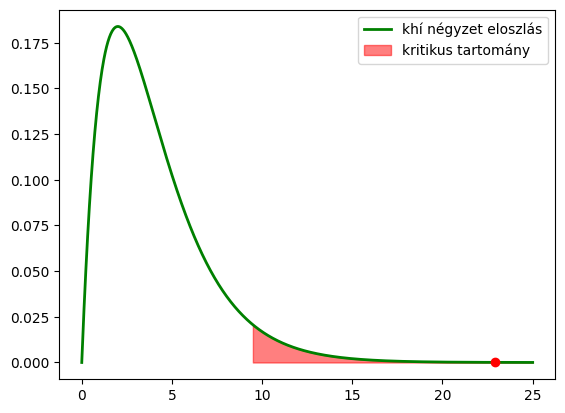

In [52]:
import matplotlib.pyplot as plt

x = np.linspace(0, 25, 1000)
x2 = np.linspace(critical_start, 25, 1000)
plt.plot(x, chi_distribution.pdf(x), 'g', lw=2, label='khí négyzet eloszlás')
plt.plot(res, chi_distribution.pdf(res), 'ro')
plt.fill_between(x2, y1=0, y2=chi_distribution.pdf(x2), color='r', alpha=0.5, label='kritikus tartomány')
plt.legend()

Így elutasítjuk a nullhipotézist.

## SciPy ellenőrzés

In [53]:
result = chi2_contingency(matrix)
result

Chi2ContingencyResult(statistic=22.916666666666664, pvalue=0.0001315736758929451, dof=4, expected_freq=array([[ 9., 12.,  9.],
       [12., 16., 12.],
       [ 9., 12.,  9.]]))

In [54]:
alpha < result.pvalue

False